In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test,y_test) = tf.keras.datasets.cifar10.load_data()

In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
y_train.shape

(50000, 1)

In [5]:
def plot_sample(index):
    plt.figure(figsize = (10,1))
    plt.imshow(X_train[index])

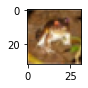

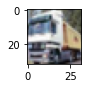

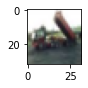

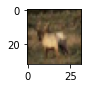

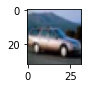

In [6]:
for i in range(0, 5):
    plot_sample(i)

In [7]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

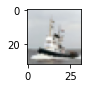

In [8]:
plot_sample(280)

In [9]:
classes[y_train[280][0]]

'ship'

In [10]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [11]:
y_train_categorical = keras.utils.to_categorical(
    y_train, num_classes=10, dtype='float32'
)
y_test_categorical = keras.utils.to_categorical(
    y_test, num_classes=10, dtype='float32'
)

In [12]:
y_train[0:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [13]:
y_train_categorical[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [14]:
model = keras.Sequential([
        #cnn
        keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
        keras.layers.MaxPooling2D((2,2)),
        keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
        keras.layers.MaxPooling2D((2,2)),
    
        #dense
        keras.layers.Flatten(),
        keras.layers.Dense(256, activation='relu'),
        keras.layers.Dense(10, activation='softmax')    
    ])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 13s 8ms/step - loss: 1.3401 - accuracy: 0.5213
Epoch 2/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.9645 - accuracy: 0.6638
Epoch 3/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.7987 - accuracy: 0.7222
Epoch 4/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.6625 - accuracy: 0.7682
Epoch 5/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.5413 - accuracy: 0.8115
Epoch 6/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.4229 - accuracy: 0.8538
Epoch 7/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.3174 - accuracy: 0.8896
Epoch 8/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.2375 - accuracy: 0.9174
Epoch 9/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.1760 - accuracy: 0.9380
Epoch 10/10
1563/1563 [==============================] - 12s 8ms/step - l

In [15]:
model.evaluate(X_test_scaled, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 1.3904 - accuracy: 0.7046


[1.3904438018798828, 0.7045999765396118]

In [16]:
y_pred = model.predict(X_test_scaled)

In [17]:
y_classes = [np.argmax(element) for element in y_pred]

In [18]:
from sklearn.metrics import classification_report

In [19]:
print(classification_report(y_test, y_classes))

              precision    recall  f1-score   support

           0       0.71      0.78      0.74      1000
           1       0.83      0.81      0.82      1000
           2       0.63      0.56      0.59      1000
           3       0.54      0.52      0.53      1000
           4       0.62      0.69      0.66      1000
           5       0.59      0.59      0.59      1000
           6       0.76      0.80      0.78      1000
           7       0.76      0.75      0.76      1000
           8       0.80      0.80      0.80      1000
           9       0.82      0.73      0.78      1000

    accuracy                           0.70     10000
   macro avg       0.71      0.70      0.70     10000
weighted avg       0.71      0.70      0.70     10000

